# 1. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import MDAnalysis as mda
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['font.size'] = 9
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['legend.frameon'] = False
mpl.font_manager.findSystemFonts(fontpaths="/home/marco/.local/share/fonts", fontext="ttf")
mpl.rcParams['font.family'] = 'Oswald'

palette = ['royalblue', 'darkorange','forestgreen']

# 2. Basic analysis

## RMSD

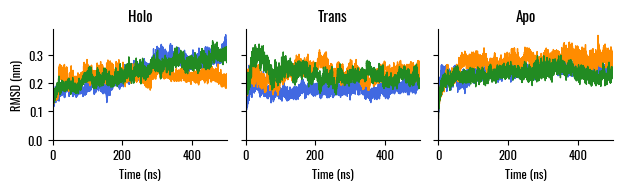

In [2]:
# Load data
time = np.loadtxt('../../02-analysis/rmsd_apo_rep1.xvg', usecols=0,comments=['#','@'])
rmsds_holo = np.column_stack((np.loadtxt('../../02-analysis/rmsd_holo_rep1.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../../02-analysis/rmsd_holo_rep2.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../../02-analysis/rmsd_holo_rep3.xvg', usecols=1,comments=['#','@'])))

rmsds_apo = np.column_stack((np.loadtxt('../../02-analysis/rmsd_apo_rep1.xvg', usecols=1,comments=['#','@']),
                             np.loadtxt('../../02-analysis/rmsd_apo_rep2.xvg', usecols=1,comments=['#','@']),
                             np.loadtxt('../../02-analysis/rmsd_apo_rep3.xvg', usecols=1,comments=['#','@'])))

rmsds_tran = np.column_stack((np.loadtxt('../../02-analysis/rmsd_trans_rep1.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../../02-analysis/rmsd_trans_rep2.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../../02-analysis/rmsd_trans_rep3.xvg', usecols=1,comments=['#','@'])))

fig,ax = plt.subplots(1,3,figsize=(16/2.54,5/2.54),sharey=True,sharex=True)
for i,r in enumerate([rmsds_holo,rmsds_tran,rmsds_apo]):
    ax[i].plot(time,r[:,0],color=palette[0],label='Rep 1')
    ax[i].plot(time,r[:,1],color=palette[1],label='Rep 2')
    ax[i].plot(time,r[:,2],color=palette[2],label='Rep 3')
    ax[i].set_xlabel('Time (ns)')
    ax[i].set_xlim(0,500)
    ax[i].set_ylim(bottom=0)

ax[0].set_ylabel('RMSD (nm)')
ax[0].set_title('Holo'); ax[1].set_title('Trans'); ax[2].set_title('Apo')
sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/RMSD.png',dpi=600,facecolor='white')

## RMSF

In [2]:
def add_helices(ax,botlim=0,w=0.02):
    from matplotlib.patches import Rectangle
    ax.add_patch(Rectangle((3,botlim),36,w,  fill=True,lw=0,color='k',zorder=0))
    ax.add_patch(Rectangle((3,botlim),299,w, fill=True,lw=0,color='darkgrey',zorder=-1))
    ax.add_patch(Rectangle((42,botlim),30,w, fill=True,lw=0,color='k',zorder=0))
    ax.add_patch(Rectangle((77,botlim),35,w, fill=True,lw=0,color='k',zorder=0))
    ax.add_patch(Rectangle((124,botlim),30,w,fill=True,lw=0,color='k',zorder=0))
    ax.add_patch(Rectangle((173,botlim),40,w,fill=True,lw=0,color='k',zorder=0))
    ax.add_patch(Rectangle((218,botlim),36,w,fill=True,lw=0,color='k',zorder=0))
    ax.add_patch(Rectangle((258,botlim),24,w,fill=True,lw=0,color='k',zorder=0))
    ax.add_patch(Rectangle((283,botlim),18,w,fill=True,lw=0,color='k',zorder=0))
    ax.text(20, botlim+w+0.005,"TM1",fontsize=9, ha='center')
    ax.text((3+36+42)/2,botlim+w+0.005,"ICL1",fontsize=9, ha='center',color='darkgrey')
    ax.text(57, botlim+w+0.005,"TM2",fontsize=9, ha='center')
    ax.text((42+30+77)/2, botlim+w+0.005,"ECL1",fontsize=9, ha='center',color='darkgrey')
    ax.text(95, botlim+w+0.005,"TM3",fontsize=9, ha='center')
    ax.text((77+35+124)/2,botlim+w+0.005,"ICL2",fontsize=9, ha='center',color='darkgrey')
    ax.text(139,botlim+w+0.005,"TM4",fontsize=9, ha='center')
    ax.text((124+30+173)/2,botlim+w+0.005,"ECL2",fontsize=9, ha='center',color='darkgrey')
    ax.text(193,botlim+w+0.005,"TM5",fontsize=9, ha='center')
    ax.text((173+40+218)/2,botlim+w+0.005,"ICL3",fontsize=9, ha='center',color='darkgrey')
    ax.text(236,botlim+w+0.005,"TM6",fontsize=9, ha='center')
    ax.text((218+36+258)/2,botlim+w+0.005,"ECL3",fontsize=9, ha='center',color='darkgrey')
    ax.text(270,botlim+w+0.005,"TM7",fontsize=9, ha='center')
    ax.text(292,botlim+w+0.005,"H8", fontsize=9, ha='center')

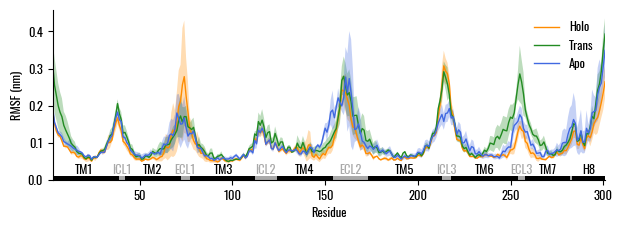

In [7]:
# load data
residues = np.loadtxt('../../02-analysis/rmsf_apo_rep1.xvg', usecols=0,comments=['#','@'])

rmsfs_holo = np.column_stack((np.loadtxt('../../02-analysis/rmsf_holo_rep1.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../../02-analysis/rmsf_holo_rep2.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../../02-analysis/rmsf_holo_rep3.xvg', usecols=1,comments=['#','@'])))

rmsfs_apo = np.column_stack((np.loadtxt('../../02-analysis/rmsf_apo_rep1.xvg', usecols=1,comments=['#','@']),
                             np.loadtxt('../../02-analysis/rmsf_apo_rep2.xvg', usecols=1,comments=['#','@']),
                             np.loadtxt('../../02-analysis/rmsf_apo_rep3.xvg', usecols=1,comments=['#','@'])))

rmsfs_tran = np.column_stack((np.loadtxt('../../02-analysis/rmsf_trans_rep1.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../../02-analysis/rmsf_trans_rep2.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../../02-analysis/rmsf_trans_rep3.xvg', usecols=1,comments=['#','@'])))

fig,ax = plt.subplots(1,1,figsize=(16/2.54,6/2.54))
ax.plot(residues,rmsfs_holo.mean(axis=1),color=palette[1],label='Holo')
ax.plot(residues,rmsfs_tran.mean(axis=1),color=palette[2],label='Trans')
ax.plot(residues,rmsfs_apo.mean(axis=1),color=palette[0],label='Apo')

ax.fill_between(residues,rmsfs_holo.mean(axis=1)-rmsfs_holo.std(axis=1),
                rmsfs_holo.mean(axis=1)+rmsfs_holo.std(axis=1),color=palette[1],alpha=0.3,edgecolor=None)
ax.fill_between(residues,rmsfs_tran.mean(axis=1)-rmsfs_tran.std(axis=1),
                rmsfs_tran.mean(axis=1)+rmsfs_tran.std(axis=1),color=palette[2],alpha=0.3,edgecolor=None)
ax.fill_between(residues,rmsfs_apo.mean(axis=1)-rmsfs_apo.std(axis=1),
                rmsfs_apo.mean(axis=1)+rmsfs_apo.std(axis=1),color=palette[0],alpha=0.3,edgecolor=None)

add_helices(ax,w=0.01)

ax.set_xlabel('Residue')
ax.set_ylabel('RMSF (nm)')
ax.set_xlim(residues[0],residues[-1])
ax.set_ylim(bottom=0)
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/RMSF.png',dpi=600,facecolor='white')

## Secondary structure

In [2]:
def ss_stride(u,selection='all',start=0,end=-1,step=-1):
    import os
    from tqdm.notebook import tqdm
    # find start time in term of frames
    time_step = u.trajectory.dt
    start_frame = int(start/time_step)
    if end == -1:
        end_frame = u.trajectory.n_frames
    else:
        end_frame = int(end/time_step)
    if step == -1:
        step_frame = 1
    else:
        step_frame = int(step/time_step)
    
    SS = []
    for _ in tqdm(u.trajectory[start_frame:end_frame:step_frame]):
        # save a pdb file
        u.select_atoms(selection).write('tmp.pdb')
        # run stride
        output = os.system('stride tmp.pdb > tmp.txt')
        if output != 0:
            ss = ['C' for _ in range(u.select_atoms(selection).residues.n_residues)]
        else:
            # read output
            with open('tmp.txt','r') as f:
                lines = f.readlines()
            # parse output
            ss = []
            for line in lines:
                if line.startswith('ASG'):
                    ss.append(line.split()[5])
        SS.append(np.array(ss))
    # clean up
    os.system('rm tmp.pdb tmp.txt')
    return np.vstack(SS)

In [3]:
../u_apo = mda.Universe('../../01-sim/7XP4/start.pdb','../../01-sim/7XP4/cat_50ps.xtc')
u_holo = mda.Universe('../../01-sim/7XP6/start.pdb','../../01-sim/7XP6/cat_50ps.xtc')
u_trans = mda.Universe('../../01-sim/7XP6_noLig/start.pdb','../../01-sim/7XP6_noLig/cat_50ps.xtc')

ss_apo = ss_stride(u_apo,selection='protein',start=0,end=-1,step=500)
np.savetxt('../../02-analysis/ss_apo.csv',ss_apo,delimiter=',',fmt='%s')
ss_holo = ss_stride(u_holo,selection='protein',start=0,end=-1,step=500)
np.savetxt('../../02-analysis/ss_holo.csv',ss_holo,delimiter=',',fmt='%s')
ss_trans = ss_stride(u_trans,selection='protein',start=0,end=-1,step=500)
np.savetxt('../../02-analysis/ss_trans.csv',ss_trans,delimiter=',',fmt='%s')

  0%|          | 0/2401 [00:00<?, ?it/s]

  0%|          | 0/2401 [00:00<?, ?it/s]

  0%|          | 0/2401 [00:00<?, ?it/s]

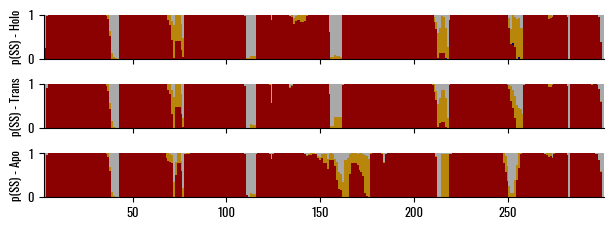

In [18]:
h_prob, e_prob, t_prob = [], [], []
ss_holo = np.loadtxt('../../02-analysis/ss_holo.csv',delimiter=',',dtype=str)
h_prob.append(np.mean((ss_holo=='H')|(ss_holo=='G')|(ss_holo=='I'),axis=0))
e_prob.append(np.mean((ss_holo=='E')|((ss_holo=='B')),axis=0))
t_prob.append(np.mean(ss_holo=='T',axis=0))

ss_trans = np.loadtxt('../../02-analysis/ss_trans.csv',delimiter=',',dtype=str)
h_prob.append(np.mean((ss_trans=='H')|(ss_trans=='G')|(ss_trans=='I'),axis=0))
e_prob.append(np.mean((ss_trans=='E')|((ss_trans=='B')),axis=0))
t_prob.append(np.mean(ss_trans=='T',axis=0))

ss_apo = np.loadtxt('../../02-analysis/ss_apo.csv',delimiter=',',dtype=str)
h_prob.append(np.mean((ss_apo=='H')|(ss_apo=='G')|(ss_apo=='I'),axis=0))
e_prob.append(np.mean((ss_apo=='E')|((ss_apo=='B')),axis=0))
t_prob.append(np.mean(ss_apo=='T',axis=0))

fig,ax = plt.subplots(3,1,figsize=(16/2.54,6/2.54),sharex=True,sharey=True)
x = np.arange(len(h_prob[0]))
for i in range(3):
    ax[i].bar(x,h_prob[i],color='darkred',width=1)
    ax[i].bar(x,e_prob[i],bottom=h_prob[i],color='navy',width=1)
    ax[i].bar(x,t_prob[i],bottom=h_prob[i]+e_prob[i],color='darkgoldenrod',width=1)
    ax[i].bar(x,np.ones(len(x))-h_prob[i]-e_prob[i]-t_prob[i],bottom=h_prob[i]+e_prob[i]+t_prob[i],color='darkgrey',width=1)


ax[0].set_ylabel('p(SS) - Holo')
ax[1].set_ylabel('p(SS) - Trans')
ax[2].set_ylabel('p(SS) - Apo')
ax[0].set_ylim(0,1)
ax[0].set_xlim(x[0]-0.5,x[-1]+0.5)
xt = np.arange(50,300,50)
ax[2].set_xticks(xt-3)
ax[2].set_xticklabels(xt)
sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/Secondary_structure.png',dpi=600,facecolor='white')

# Volume

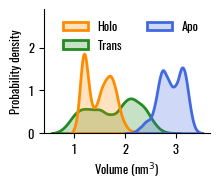

In [67]:
# Load volume data
vol_holo = np.loadtxt('../../02-analysis/volume_holo.dat', usecols=1,skiprows=1)/1000
vol_apo = np.loadtxt('../../02-analysis/volume_apo.dat', usecols=1,skiprows=1)/1000
vol_tran = np.loadtxt('../../02-analysis/volume_trans.dat', usecols=1,skiprows=1)/1000

fig,ax = plt.subplots(1,1,figsize=(6/2.54,5/2.54))
sns.kdeplot(vol_holo,ax=ax,color=palette[1],label='Holo',cut=0, fill=True,zorder=1)
sns.kdeplot(vol_tran,ax=ax,color=palette[2],label='Trans',cut=0, fill=True,zorder=0)
sns.kdeplot(vol_apo,ax=ax,color=palette[0],label='Apo',cut=0, fill=True,zorder=1)
ax.set_xlabel('Volume (nm$^3$)')
ax.set_ylabel('Probability density')
ax.set_ylim(0,2.9)
ax.legend(ncol=2)
sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/Volume.png',dpi=600,facecolor='white')

# Angle 241

In [25]:
u_apo = mda.Universe('../../01-sim/7XP4/start.pdb','../../01-sim/7XP4/cat_50ps.xtc')
u_holo = mda.Universe('../../01-sim/7XP6/start.pdb','../../01-sim/7XP6/cat_50ps.xtc')
u_trans = mda.Universe('../../01-sim/7XP6_noLig/start.pdb','../../01-sim/7XP6_noLig/cat_50ps.xtc')
from MDAnalysis.lib.distances import calc_dihedrals

# compute the angle of Y241
angles,dihedrals,distances1, distances2 = [], [], [], []
for U in [u_apo,u_holo,u_trans]:
    angle = []
    pos_CA, pos_CB, pos_CG, pos_CD1, d1, d2 = [], [], [], [], [] , []
    for _ in U.trajectory:
        v1 = U.select_atoms('resid 241 and name CA').positions[0] - U.select_atoms('resid 241 and name CG CD2 CE2 CZ CE1 CD1').center_of_mass()
        v2 = U.select_atoms('resid 241 and name CA').positions[0] - U.select_atoms('resid 271 and name CA').positions[0]
        a1 = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))*180/np.pi
        v2 = U.select_atoms('resid 241 and name CA').positions[0] - U.select_atoms('resid 188 and name CA').positions[0]
        a2 = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))*180/np.pi
        pos_CA.append(U.select_atoms('resid 241 and name CA').positions[0])
        pos_CB.append(U.select_atoms('resid 241 and name CB').positions[0])
        pos_CG.append(U.select_atoms('resid 241 and name CG').positions[0])
        pos_CD1.append(U.select_atoms('resid 241 and name CD1').positions[0])
        angle.append([a1,a2])
        d1.append(np.sqrt(np.sum((U.select_atoms('resid 241').center_of_mass()-\
                                     U.select_atoms('resid 274').center_of_mass())**2)))
        d2.append(np.sqrt(np.sum((U.select_atoms('resid 241').center_of_mass()-\
                                     U.select_atoms('resid 92').center_of_mass())**2)))
    dihedrals.append(np.rad2deg(calc_dihedrals(np.vstack(pos_CA),np.vstack(pos_CB),np.vstack(pos_CG),np.vstack(pos_CD1))))
    distances1.append(np.vstack(d1))
    distances2.append(np.vstack(d2))
    angles.append(np.vstack(angle))

angles = np.stack(angles)
dihedrals = np.column_stack(dihedrals)
distances1 = np.column_stack(distances1)
distances2 = np.column_stack(distances2)


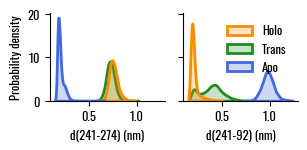

In [45]:
apo_pairdist = pd.read_csv('../../02-analysis/APO_pairdist.csv',index_col=0)
holo_pairdist = pd.read_csv('../../02-analysis/HOLO_pairdist.csv',index_col=0)
trans_pairdist = pd.read_csv('../../02-analysis/TRANS_pairdist.csv',index_col=0)

distances1 = np.column_stack((apo_pairdist['r274'],holo_pairdist['r274'],trans_pairdist['r274']))
distances2 = np.column_stack((apo_pairdist['r92'],holo_pairdist['r92'],trans_pairdist['r92']))

fig,axes = plt.subplots(1,2,figsize=(8/2.54,4/2.54),sharex=True,sharey=True)
ax = axes[0]
sns.kdeplot(x=distances1[:,1],ax=ax,color=palette[1],label='Holo',cut=0, fill=True,zorder=0) # median -107.3
sns.kdeplot(x=distances1[:,2],ax=ax,color=palette[2],label='Trans',cut=0, fill=True,zorder=-1)  # median -115.1
sns.kdeplot(x=distances1[:,0],ax=ax,color=palette[0],label='Apo',cut=0, fill=True,zorder=0) # peak at -54.7
# ax.axvline(dist1_apo,ls='--',color=palette[0],lw=1.5)
# ax.axvline(dist1_holo,ls='--',color=palette[1],lw=1.5)
# ax.legend()
ax.set_xlabel(r'd(241-274) (nm)')
ax.set_ylabel('Probability density')

ax = axes[1]
sns.kdeplot(x=distances2[:,1],ax=ax,color=palette[1],label='Holo',cut=0, fill=True,zorder=0) # median -107.3
sns.kdeplot(x=distances2[:,2],ax=ax,color=palette[2],label='Trans',cut=0, fill=True,zorder=-1)  # median -115.1
sns.kdeplot(x=distances2[:,0],ax=ax,color=palette[0],label='Apo',cut=0, fill=True,zorder=0) # peak at -54.7
# ax.axvline(dist2_apo,ls='--',color=palette[0],lw=1.5)
# ax.axvline(dist2_holo,ls='--',color=palette[1],lw=1.5)
ax.legend()
ax.set_xlabel(r'd(241-92) (nm)')
ax.set_ylabel('Probability density')

sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/distances.png',dpi=600,facecolor='white')

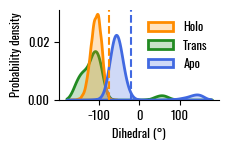

In [46]:
exp_apo = mda.Universe('../../00-model/00-pdbs/7xp4_R.pdb')
# exp_apo = mda.Universe('../01-sim/7XP4/start.pdb')
dihedral_apo = calc_dihedrals(exp_apo.select_atoms('resid 241 and name CA').positions[0],
                                exp_apo.select_atoms('resid 241 and name CB').positions[0],
                                exp_apo.select_atoms('resid 241 and name CG').positions[0],
                                exp_apo.select_atoms('resid 241 and name CD1').positions[0])
exp_holo = mda.Universe('../../00-model/00-pdbs/7xp6_R.pdb')
# exp_holo = mda.Universe('../01-sim/7XP6/start.pdb')
dihedral_holo = calc_dihedrals(exp_holo.select_atoms('resid 241 and name CA').positions[0],
                                exp_holo.select_atoms('resid 241 and name CB').positions[0],
                                exp_holo.select_atoms('resid 241 and name CG').positions[0],
                                exp_holo.select_atoms('resid 241 and name CD1').positions[0])

D = dihedrals.copy()
# D[D<0] = D[D<0]+360
fig,ax = plt.subplots(1,1,figsize=(6/2.54,4/2.54),sharex=True,sharey=True)
sns.kdeplot(x=D[:,1],ax=ax,color=palette[1],label='Holo',cut=0, fill=True,zorder=0) # median -107.3
sns.kdeplot(x=D[:,2],ax=ax,color=palette[2],label='Trans',cut=0, fill=True,zorder=-1)  # median -115.1
sns.kdeplot(x=D[:,0],ax=ax,color=palette[0],label='Apo',cut=0, fill=True,zorder=0) # peak at -54.7
ax.axvline(np.rad2deg(dihedral_apo),ls='--',color=palette[0],lw=1.5)
ax.axvline(np.rad2deg(dihedral_holo),ls='--',color=palette[1],lw=1.5)
# ax.axvline(-55,ls='--',color='k',lw=1.5)
ax.legend()
ax.set_xlabel(r'Dihedral (°)')
ax.set_ylabel('Probability density')
sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/Dihedral.png',dpi=600,facecolor='white')

In [21]:
frames_peak_apo = np.where((D[:,0]>-54.75)&(D[:,0]<-54.65))[0]
frames_peak_holo = np.where((D[:,1]>-107.35)&(D[:,1]<-107.25))[0]
frames_peak_trans = np.where((D[:,2]>-115.15)&(D[:,2]<-115.05))[0]
print(f'Frames in apo peak: {frames_peak_apo}')
print(f'Frames in holo peak: {frames_peak_holo}')
print(f'Frames in trans peak: {frames_peak_trans}')

Frames in apo peak: [ 1458  1492  1687  1771  1804  2021  2040  2095  2253  2742  4062  4150
  4155  4669  4701  4998  5658  6748  6957  7754  8211  9749  9817  9863
  9876 10222 10422 10563 10884 11215 11354 11614 12020 12499 12815 13181
 13362 13495 13693 13771 14924 15105 15342 15645 16017 16070 16393 16566
 16649 17470 17727 18239 18503 18841 19667 19703 20130 20591 22986]
Frames in holo peak: [  579   713   799  1132  2017  2741  3021  3246  3506  3509  3859  4062
  4453  4717  4815  4920  5159  5242  5924  7680  8196  8423  8574  8716
  8938  9111  9232  9267  9389 10267 11028 11086 12100 12135 12918 13046
 13382 13861 14200 14537 14680 15540 15661 16628 16789 17167 17301 17486
 18079 18333 18397 18523 18669 20038 20731 20772 20967 21078 21275 21483
 21607 21610 21835 22387 22629 23297 23368 23592 23633 23670 23944]
Frames in trans peak: [    9   982  2489  3317  3686  3869  5210  6309  7009  7192  7895  8380
  8642  8875  9683 10511 11682 11767 12010 12374 14276 16100 16444 1694

In [23]:
# create an ensemble of structures
with mda.Writer('../../02-analysis/peak_apo.pdb',u_apo.atoms.n_atoms) as W:
    for f in frames_peak_apo:
        u_apo.trajectory[f]
        W.write(u_apo.atoms)
with mda.Writer('../../02-analysis/peak_holo.pdb',u_holo.atoms.n_atoms) as W:
    for f in frames_peak_holo:
        u_holo.trajectory[f]
        W.write(u_holo.atoms)
with mda.Writer('../../02-analysis/peak_trans.pdb',u_trans.atoms.n_atoms) as W:
    for f in frames_peak_trans:
        u_trans.trajectory[f]
        W.write(u_trans.atoms)


# Stability of interactions between Strychnine and the receptor

In [9]:
def InteractionProbability(u,lig_chains,sel='protein',start=0,end=-1,step=1,nt=1):
    '''
    Function to compute the probabilitiy of specific interactions as identified by PLIP
    between each residue of a subset of atoms and any atom of the second subset.

    Reference
    Adasme,M. et al. PLIP 2021: expanding the scope of the protein-ligand interaction profiler to DNA and RNA.
    Nucl. Acids Res. (05 May 2021), gkab294. doi: 10.1093/nar/gkab294
    
    Input
    ----------
    u:          MDAnalysis universe containing the input system.
    lig_chains: Chain of the subset of atoms to treat as ligand. It can also refer to protein atoms.
    sel:        Selection string for the subset of atoms to treat as receptor.
    start:      Starting time of analysis in ps. Default: 0
    end:        Last time of analysis in ps. Default: -1 (end of trajectory)
    step:       time step for the analysis. Default
    nt:         Number of cpus to use threshold in Angstrom to define the contact. Default 1

    Returns
    -------
    int_res:    Dataframe containing the information about interactions and related probabilities.
    '''

    # try the import of plip
    try:
        from plip.basic import config
        from plip.structure.preparation import PDBComplex
    except ImportError:
        print('To use the InteractionProbability function it is necessary to install plip in the environment.')
        print('Try using conda install -n [NAME ENV] -c conda-forge plip')
        exit(1)
    
    # initialization
    if (not step) & (type(step) == int):
        time_step = step
        step_frame = int(step/u.trajectory.dt)
    elif (not step) & (type(step) != int):
        print('Input time step in ps is expected as integer.')
        exit(1)
    else:
        time_step = u.trajectory.dt
        step_frame = 1
    
    start_frame = int(start/time_step)
    if end != -1:
        end_frame = int(end/time_step)
    else:
        end_frame = u.trajectory.n_frames
    tot_frames = end_frame - start_frame

    for ts in u.trajectory[start_frame:end_frame:step_frame]:
        selec = u.select_atoms(sel)
        selec.write('pippo.pdb')
        mymol = PDBComplex()
        mymol.load_pdb('pippo.pdb')
        # set the protein peptide chain
        config.PEPTIDES = lig_chains
        config.MAXTHREADS = nt
        mymol.analyze()
        tp = list()
        protc = list(); protn = list(); prott = list()
        ligc = list(); lign = list(); ligt = list()
        if ts.frame == start_frame:
            # for the first frame, initialize the dataframe of results
            for k in mymol.interaction_sets.keys():
                for interaction in mymol.interaction_sets[k].all_itypes:
                    tp.append(str(interaction).split("(")[0])
                    protc.append(interaction.reschain)
                    protn.append(interaction.resnr)
                    prott.append(interaction.restype)
                    ligc.append(interaction.reschain_l)
                    lign.append(interaction.resnr_l)
                    ligt.append(interaction.restype_l)
            int_res = pd.DataFrame({"Type":tp,
                                    "Chain_1":protc,"Name_1":prott,"Num_1":protn,
                                    "Chain_2":ligc,"Name_2":ligt,"Num_2":lign})
            int_res['probability'] = np.ones(int_res.shape[0])
            int_res = int_res.drop_duplicates(ignore_index=True)
            

        else:
            # here update the initialized dataframe
            for k in mymol.interaction_sets.keys():
                for interaction in mymol.interaction_sets[k].all_itypes:
                    tp.append(str(interaction).split("(")[0])
                    protc.append(interaction.reschain)
                    protn.append(interaction.resnr)
                    prott.append(interaction.restype)
                    ligc.append(interaction.reschain_l)
                    lign.append(interaction.resnr_l)
                    ligt.append(interaction.restype_l)
            provv = pd.DataFrame({"Type":tp,
                                  "Chain_1":protc,"Name_1":prott,"Num_1":protn,
                                  "Chain_2":ligc,"Name_2":ligt,"Num_2":lign})
            provv = provv.drop_duplicates(ignore_index=True)
            provv['probability'] = np.ones(provv.shape[0])
            for _,row in provv.iterrows():
                # search if the same interaction has been found previously
                tt = int_res[(int_res['Type'] == row['Type']) & \
                             (int_res['Chain_1'] == row['Chain_1']) & \
                             (int_res['Name_1'] == row['Name_1']) & \
                             (int_res['Num_1'] == row['Num_1']) & \
                             (int_res['Chain_2'] == row['Chain_2']) & \
                             (int_res['Name_2'] == row['Name_2']) & \
                             (int_res['Num_2'] == row['Num_2'])].index.tolist()
                if tt:
                    # if found increase the count
                    int_res.loc[tt,'probability'] += 1
                else:
                    # if not found add a new row
                    int_res = pd.concat([pd.DataFrame([row]), int_res], ignore_index=True)
        # cleaning
        os.remove('pippo.pdb')
        
    # divide for the number of frames to obtain the probability
    int_res['probability'] = int_res['probability']/tot_frames
    return int_res

In [17]:
u_holo = mda.Universe('../../01-sim/7XP6/start.pdb','../../01-sim/7XP6/cat_50ps.xtc')
interactions = InteractionProbability(u_holo,lig_chains=['B'],sel='byres (around 15 resname LIG) or resname LIG',start=0,end=-1,step=1,nt=1)
interactions.to_csv('../../02-analysis/interactions_strychnine.csv',index=False)

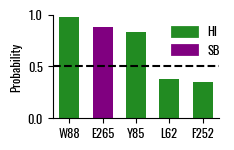

In [47]:
interactions.sort_values(by='probability',ascending=False,inplace=True)
resname_convert = {'ALA':'A','ARG':'R','ASN':'N','ASP':'D','CYS':'C','GLN':'Q','GLU':'E','GLY':'G','HIS':'H',
                   'ILE':'I','LEU':'L','LYS':'K','MET':'M','PHE':'F','PRO':'P','SER':'S','THR':'T','TRP':'W',
                   'TYR':'Y','VAL':'V','HID':'H','HIE':'H','HIP':'H','CYX':'C','CYM':'C','ASH':'D','GLH':'E'}
colordef = {'hbond':'darkorange','hydroph_interaction':'forestgreen','saltbridge':'purple',
            'pistack':'royalblue','pication':'tomato'}
short_type = {'hbond':'HB','hydroph_interaction':'HI','saltbridge':'SB',
            'pistack':'PS','pication':'PC'}
          
xlab = [f'{resname_convert[row["Name_1"]]}{row["Num_1"]}' for _,row in interactions.iterrows()]
colors = [colordef[row['Type']] for _,row in interactions.iterrows()]

fig,ax = plt.subplots(1,1,figsize=(6/2.54,4/2.54))
N = 5
ax.bar(np.arange(N),interactions['probability'].values[:N],color=colors[:N],width=0.6)
ax.axhline(0.5,color='k',ls='--',lw=1.5)

# create legend for color associated to interaction type
int_to_show = np.unique(interactions['Type'].values[:N])
handles = [plt.Rectangle((0,0),1,1,color=colordef[i]) for i in int_to_show]
labels = [short_type[i] for i in int_to_show]
ax.legend(handles,labels,loc='upper left',bbox_to_anchor=(0.65,1),ncol=1)

ax.set_xticks(np.arange(N))
ax.set_xticklabels(xlab[:N])
ax.set_ylabel('Probability')
ax.set_ylim(0,1)
ax.set_yticks([0,0.5,1])
ax.set_xlim(-0.5,N-0.5)
sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/interactions_strychnine.png',dpi=600,facecolor='white')

# Comparison with class A

## A100
$$ A^{100}=-14.43 R^{I27,W281}-7.62 R^{R55,H93}+9.11 R^{L98,S129}-6.32 R^{C203,H228}-5.22 R^{S252,F261}+278.88 $$

In [9]:
def compute_A100(u):
    d1 = np.linalg.norm(u.select_atoms('resid 27 and name CA').positions[0] - u.select_atoms('resid 281 and name CA').positions[0])
    d2 = np.linalg.norm(u.select_atoms('resid 55 and name CA').positions[0] - u.select_atoms('resid 93 and name CA').positions[0])
    d3 = np.linalg.norm(u.select_atoms('resid 98 and name CA').positions[0] - u.select_atoms('resid 129 and name CA').positions[0])
    d4 = np.linalg.norm(u.select_atoms('resid 203 and name CA').positions[0] - u.select_atoms('resid 228 and name CA').positions[0])
    d5 = np.linalg.norm(u.select_atoms('resid 252 and name CA').positions[0] - u.select_atoms('resid 261 and name CA').positions[0])
    a100 = -14.43*d1-7.62*d2+9.11*d3-6.32*d4-5.22*d5+278.88
    return a100

In [ ]:
u_apo = mda.Universe('../../01-sim/7XP4/start.pdb','../../01-sim/7XP4/cat_50ps_fit.xtc')
u_holo = mda.Universe('../../01-sim/7XP6/start.pdb','../../01-sim/7XP6/cat_50ps.xtc')
u_trans = mda.Universe('../../01-sim/7XP6_noLig/start.pdb','../../01-sim/7XP6_noLig/cat_50ps.xtc')
a100 = []
for U in [u_holo,u_trans,u_apo]:
    d = []
    for _ in U.trajectory:
        d.append(compute_A100(U))
    a100.append(np.array(d))

a100 = np.column_stack(a100)

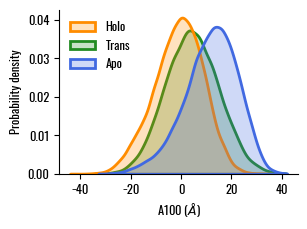

In [15]:
fig,ax = plt.subplots(1,1,figsize=(8/2.54,6/2.54))
sns.kdeplot(a100[:,0],ax=ax,color=palette[1],label='Holo',cut=0, fill=True,zorder=1)
sns.kdeplot(a100[:,1],ax=ax,color=palette[2],label='Trans',cut=0, fill=True,zorder=0)
sns.kdeplot(a100[:,2],ax=ax,color=palette[0],label='Apo',cut=0, fill=True,zorder=1)
ax.set_xlabel(r'A100 ($\AA$)')
ax.set_ylabel('Probability density')
ax.legend(loc='upper left')
sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/A100.png',dpi=600,facecolor='white')

## Conformational change of TM6

In [11]:
u_apo = mda.Universe('../../01-sim/7XP4/start.pdb','../../01-sim/7XP4/cat_50ps_fit.xtc')
u_holo = mda.Universe('../../01-sim/7XP6/start.pdb','../../01-sim/7XP6/cat_50ps.xtc')
u_trans = mda.Universe('../01-sim/7XP6_noLig/start.pdb','../../01-sim/7XP6_noLig/cat_50ps.xtc')
dist = []
for U in [u_holo,u_trans,u_apo]:
    d = []
    for _ in U.trajectory:
        d.append(np.linalg.norm(U.select_atoms('resid 104 to 110 ').center_of_mass() - U.select_atoms('resid 218 to 224 and name CA').center_of_mass()))
    dist.append(np.array(d))

dist = np.column_stack(dist)

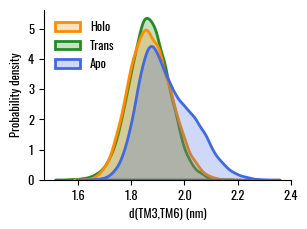

In [13]:
fig,ax = plt.subplots(1,1,figsize=(8/2.54,6/2.54))
sns.kdeplot(dist[:,0]/10,ax=ax,color=palette[1],label='Holo',cut=0, fill=True,zorder=1)
sns.kdeplot(dist[:,1]/10,ax=ax,color=palette[2],label='Trans',cut=0, fill=True,zorder=0)
sns.kdeplot(dist[:,2]/10,ax=ax,color=palette[0],label='Apo',cut=0, fill=True,zorder=1)
ax.set_xlabel(r'd(TM3,TM6) (nm)')
ax.set_ylabel('Probability density')
ax.legend(loc='upper left')
sns.despine()
fig.tight_layout()
fig.savefig('../../05-Images/tm3_tm6_dist.png',dpi=600,facecolor='white')